# Load and visualize network distance network distance bands

GraphML input file available on UAL box folder. Pickle input file created in test-network-distance.ipynb.

In [1]:
import osmnx as ox
import pickle

# chose some node to explore its bands
center_node = 65363153

In [2]:
%%time
G = ox.load_graphml('bayarea_tertiary_strongly_simplified.graphml', folder='../data/network/')

Wall time: 8.2 s


In [3]:
%%time
with open('../data/node_bands.pickle', 'rb') as f:
    bands = pickle.load(f)

Wall time: 328 ms


In [4]:
# how many nodes do we have distance bands calculated for?
len(bands.keys())

1824

In [5]:
# what are the distance bands we calculated?
sorted(bands[center_node].keys())

[(0, 1000), (1000, 5000), (5000, 10000)]

In [6]:
# what nodes are within the first distance band of the first node?
len(bands[center_node][(0,1000)])

119

In [7]:
# color nodes by distance bands
nc = []
for node in G.nodes():
    if node in bands[center_node][(0,1000)]:
        nc.append('r')
    elif node in bands[center_node][(1000,5000)]:
        nc.append('m')
    elif node in bands[center_node][(5000,10000)]:
        nc.append('b')
    else:
        nc.append('g')

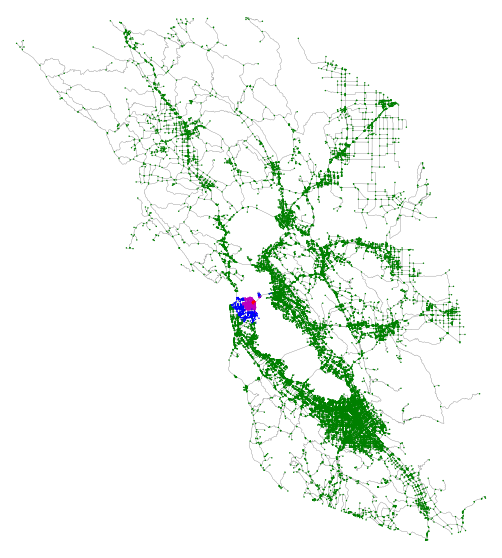

In [8]:
# plot the network
fig, ax = ox.plot_graph(G, fig_height=10, node_size=2, edge_linewidth=0.25,
                        node_color=nc, node_zorder=2)